In [6]:
import os 
import progressbar
import numpy as np
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

from utils import aggregateParams
from plot import errorbar_plot, calc_means_and_stds

### Find Best Params

First find the best params

In [5]:
all_results, all_params_to_mse, all_mse_to_params, all_mse = aggregateParams("../experiments_10iterations_all_params/")

100% (46080 of 46080) |##################| Elapsed Time: 0:00:10 Time:  0:00:10


Result 0: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1 with mean test MSE 4324.2002999999995 - std test MSE 482.374113327232
Result 1: maxtime15_pop512_mr0.1_tour8_maxHeight2_cr1 with mean test MSE 4377.521 - std test MSE 693.5872031814823
Result 2: maxtime20_pop512_mr0.01_tour8_maxHeight2_cr1 with mean test MSE 4411.3274 - std test MSE 531.7482366106058
Result 3: maxtime20_pop256_mr0.01_tour8_maxHeight4_cr1 with mean test MSE 4471.228 - std test MSE 648.0514775324566
Result 4: maxtime20_pop1024_mr0.01_tour8_maxHeight2_cr1 with mean test MSE 4512.0114 - std test MSE 344.5601731893381
Result 5: maxtime20_pop1024_mr0_tour8_maxHeight2_cr1 with mean test MSE 4553.743 - std test MSE 651.7048964724925
Result 6: maxtime20_pop1024_mr0.1_tour8_maxHeight2_cr0.75 with mean test MSE 4554.3984 - std test MSE 511.43883018080584
Result 7: maxtime15_pop256_mr0.1_tour8_maxHeight2_cr0.75 with mean test MSE 4558.7931 - std test MSE 722.5538271608327
Result 8: maxtime20_pop1024_mr0.1_tour8_maxHeight2_cr1

In [2]:
best_results, best_params_to_mse, best_mse_to_params, best_mse = aggregateParams("../experiments_30_iterations_best_params/")

100% (2880 of 2880) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


Result 0: maxtime20_pop1024_mr0_tour8_maxHeight2_cr0.75 with mean mse 4578.1650666666665, std mse 660.046994717588
Result 1: maxtime20_pop512_mr0.001_tour8_maxHeight4_cr1 with mean mse 4664.860366666667, std mse 719.9528788692849
Result 2: maxtime20_pop512_mr0.1_tour4_maxHeight2_cr1 with mean mse 4673.942633333333, std mse 817.7440717542835
Result 3: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1 with mean mse 4702.345066666667, std mse 1392.4969554984345
Result 4: maxtime20_pop1024_mr0.01_tour8_maxHeight2_cr0.75 with mean mse 4718.8314, std mse 646.1425687991135
Result 5: maxtime20_pop256_mr0.001_tour8_maxHeight4_cr1 with mean mse 4768.8389, std mse 1093.5350250896165
Result 6: maxtime20_pop1024_mr0_tour8_maxHeight2_cr1 with mean mse 4799.922966666667, std mse 681.7446791272948
Result 7: maxtime20_pop1024_mr0.01_tour8_maxHeight2_cr1 with mean mse 4819.6245, std mse 960.2067612681944
Result 8: maxtime20_pop1024_mr0.1_tour8_maxHeight2_cr1 with mean mse 4820.998866666667, std mse 837.9464

## Analyze Number of Individuals

### With initial backprop and with iterations and generations

#### Test MSE

In [2]:
# learning rate is always 0.001

all_results, all_params_to_mse, all_mse_to_params, all_mse, all_files, all_vals = aggregateParams("../experiments_numInd_withInitial_genIter/", allStats = True, printNum = 10)

100% (7560 of 7560) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


Result 0: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK0.2_unK-1_gen1_lr0.001_it10_oIt10 with mean test MSE 4267.61155 , std test MSE 1500.1126220263202
Result 1: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0.2_gen10_lr0.001_it1_oIt1 with mean test MSE 4350.04285 , std test MSE 1170.4415146747099
Result 2: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0.9_gen15_lr0.001_it1_oIt1 with mean test MSE 4365.8549 , std test MSE 1099.3032360565057
Result 3: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0.7_gen1_lr0.001_it5_oIt5 with mean test MSE 4392.13855 , std test MSE 1178.0370648023134
Result 4: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK0.8_unK-1_gen10_lr0.001_it1_oIt1 with mean test MSE 4401.4359 , std test MSE 1293.4191244639717
Result 5: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK0.2_unK-1_gen2_lr0.001_it10_oIt10 with mean test MSE 4422.0698 , std test MSE 1036.293754004631
Result 6: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__t

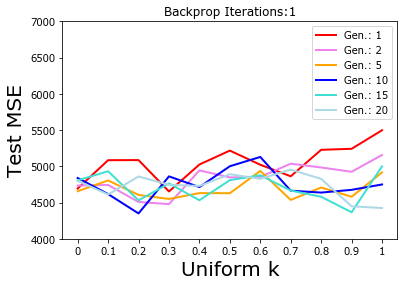

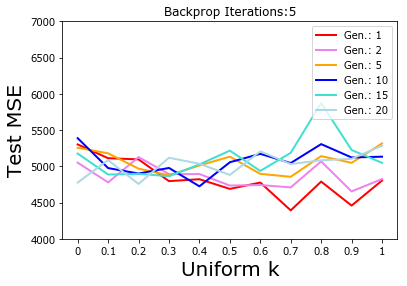

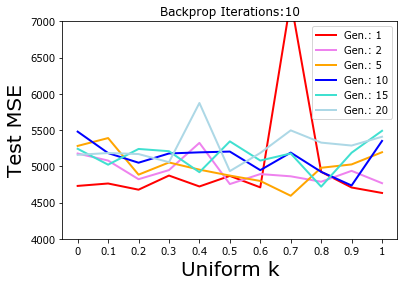

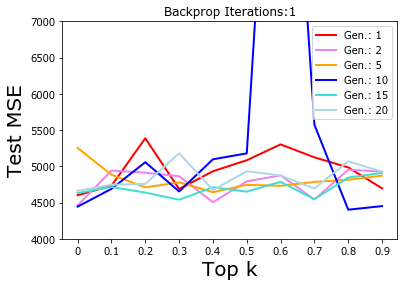

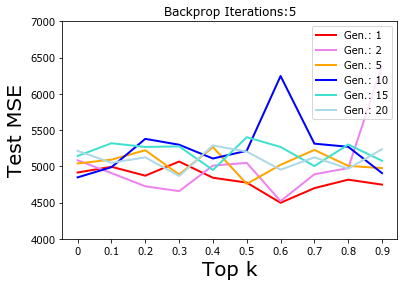

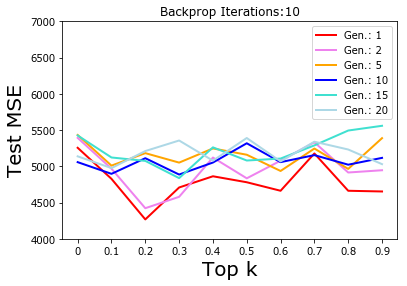

In [6]:
# Plots for results above
backpropGeneration = [1, 2, 5, 10, 15, 20] # every how many generations to perfrom backprop
bIterations = [1, 5, 10] # how many iterations of backprop to perform
uniformK = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
topK = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Initialize arrays
res = []
for i in bIterations:
    resI = []
    for g in backpropGeneration:
        resG = []
        for u in uniformK:
            resG.append([])
        resI.append(resG)
    res.append(resI)

resTop = []
for i in bIterations:
    resI = []
    for g in backpropGeneration:
        resG = []
        for t in topK:
            resG.append([])
        resI.append(resG)
    resTop.append(resI)
       
# Determine parameter values of each file               
for fIndex, f in enumerate(all_files):
    index = f.find("gen") + 3
    character = f[index]
    g = ""
    while character.isdigit():
        g += character
        index += 1
        character = f[index]
        
    index = f.find("_it") + 3
    character = f[index]
    i = ""
    while character.isdigit():
        i += character
        index += 1
        character = f[index]
        
    index = f.find("unK") + 3
    character = f[index]
    u = ""
    while character.isdigit() or character == ".":
        u += character
        index += 1
        character = f[index]
    
    index = f.find("topK") + 4
    character = f[index]
    t = ""
    while character.isdigit() or character == ".":
        t += character
        index += 1
        character = f[index]
        
    if len(u) > 0:
        res[bIterations.index(int(i))][backpropGeneration.index(int(g))][uniformK.index(float(u))].append(all_vals[fIndex])
    if not t == "1":
        resTop[bIterations.index(int(i))][backpropGeneration.index(int(g))][topK.index(float(t))].append(all_vals[fIndex])
        
colors = ["red", "violet", "orange", "blue", "turquoise", "lightblue", 
          "darkgreen", "limegreen", "#ffea00"]

# Plots for uniform k
for iIndex, i in enumerate(bIterations):
    c = 0
    for gIndex, g in enumerate(backpropGeneration):
        vals = [np.mean(x) for x in res[iIndex][gIndex]] # averages
        lb = [sms.DescrStatsW(x).tconfint_mean()[0] for x in res[iIndex][gIndex]]
        ub = [sms.DescrStatsW(x).tconfint_mean()[1] for x in res[iIndex][gIndex]]
        plt.plot(np.arange(len(uniformK)), vals,  color = colors[c], linestyle = "-", 
                     linewidth = 2, label = "Gen.: " + str(g))
        #plt.fill_between(range(np.array(vals).shape[0]), ub, 
        #         lb, color = colors[c], alpha=.2) # confidence intervals
        c += 1

    axes = plt.gca()
    axes.set_xlabel("Uniform k", size = 20)
    axes.set_ylabel("Test MSE", size = 20)
    plt.title("Backprop Iterations:" + str(i))
    plt.xticks(np.arange(len(uniformK)), uniformK)
    axes.legend(loc=1, prop={'size': 10})
    axes.set_ylim(bottom=4000, top = 7000)
    plt.show()
    #fig.savefig("Q4_ucbFixed.png", quality = 90) # save plot

# Plots for top k
for iIndex, i in enumerate(bIterations):
    c = 0
    for gIndex, g in enumerate(backpropGeneration):
        vals = [np.mean(x) for x in resTop[iIndex][gIndex]] # averages
        lb = [sms.DescrStatsW(x).tconfint_mean()[0] for x in resTop[iIndex][gIndex]]
        ub = [sms.DescrStatsW(x).tconfint_mean()[1] for x in resTop[iIndex][gIndex]]
        plt.plot(np.arange(len(topK)), vals,  color = colors[c], linestyle = "-", 
                     linewidth = 2, label = "Gen.: " + str(g))
        #plt.fill_between(range(np.array(vals).shape[0]), ub, 
        #         lb, color = colors[c], alpha=.2) # confidence intervals
        c += 1

    axes = plt.gca()
    axes.set_xlabel("Top k", size = 20)
    axes.set_ylabel("Test MSE", size = 20)
    plt.title("Backprop Iterations:" + str(i))
    plt.xticks(np.arange(len(topK)), topK)
    axes.legend(loc=1, prop={'size': 10})
    axes.set_ylim(bottom=4000, top = 7000)
    plt.show()

#### Train MSE

In [2]:
all_results, all_params_to_mse, all_mse_to_params, all_mse, all_files, all_vals = aggregateParams("../experiments_numInd_withInitial_genIter/", valType = "train_mse", allStats = True, printNum = 10)

100% (7560 of 7560) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


Result 0: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0.2_gen10_lr0.001_it1_oIt1 with mean train MSE 4244.9237 - std train MSE 521.9296263823213
Result 1: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK0.8_unK-1_gen10_lr0.001_it1_oIt1 with mean train MSE 4339.9798 - std train MSE 444.69032778974105
Result 2: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK0.2_unK-1_gen1_lr0.001_it10_oIt10 with mean train MSE 4343.6382 - std train MSE 581.0718587949615
Result 3: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0.9_gen20_lr0.001_it1_oIt1 with mean train MSE 4377.4942 - std train MSE 578.455534985379
Result 4: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK0_unK-1_gen2_lr0.001_it1_oIt1 with mean train MSE 4415.16895 - std train MSE 825.2035805764906
Result 5: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK0.2_unK-1_gen2_lr0.001_it10_oIt10 with mean train MSE 4443.3376 - std train MSE 667.1204754064015
Result 6: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr

#### Test - train MSE

In [2]:
all_results, all_params_to_mse, all_mse_to_params, all_mse, all_files, all_vals = aggregateParams("../experiments_numInd_withInitial_genIter/", valType = "diff_mse", allStats = True, printNum = 10)

100% (7560 of 7560) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


Result 0: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0.9_gen15_lr0.001_it1_oIt1 with mean test - train MSE -327.42105000000004 - std test - train MSE 923.0109351108796
Result 1: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0.3_gen2_lr0.001_it1_oIt1 with mean test - train MSE -282.97384999999997 - std test - train MSE 1088.0118497719773
Result 2: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK0.9_unK-1_gen1_lr0.001_it1_oIt1 with mean test - train MSE -234.59375 - std test - train MSE 1441.9035289270214
Result 3: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0_gen1_lr0.001_it10_oIt10 with mean test - train MSE -213.30080000000004 - std test - train MSE 1019.5328984556244
Result 4: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK0.6_unK-1_gen2_lr0.001_it5_oIt5 with mean test - train MSE -211.31439999999992 - std test - train MSE 889.097595431363
Result 5: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK0.1_unK-1_gen15_lr0.001_it1_oIt1 with mean 

#### Number of generations

In [18]:
all_results, all_params_to_gen, all_gen_to_params, all_gen, all_files, all_vals = aggregateParams("../experiments_numInd_withInitial_genIter/", valType = "numGen", allStats = True, printNum = 10)

100% (7560 of 7560) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


Result 0: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK0.9_unK-1_gen1_lr0.001_it10_oIt10 with mean numGen 7.35 - std numGen 0.6708203932499369
Result 1: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0.9_gen1_lr0.001_it10_oIt10 with mean numGen 8.1 - std numGen 0.9679060415469871
Result 2: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK0.8_unK-1_gen1_lr0.001_it10_oIt10 with mean numGen 8.3 - std numGen 0.7326950970650465
Result 3: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK0.7_unK-1_gen1_lr0.001_it10_oIt10 with mean numGen 8.35 - std numGen 1.1367080817685316
Result 4: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK1_gen1_lr0.001_it10_oIt10 with mean numGen 8.6 - std numGen 1.231174022502185
Result 5: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK0.8_unK-1_gen1_lr0.001_it5_oIt5 with mean numGen 9.1 - std numGen 1.5861240410775603
Result 6: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0.6_gen1_lr0.001_it10_oIt10 with mean numGen 9.45 -

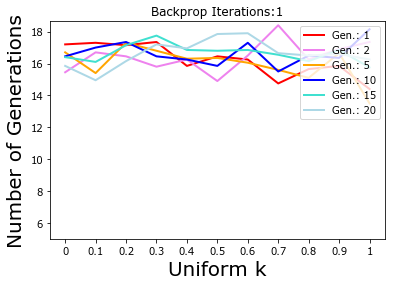

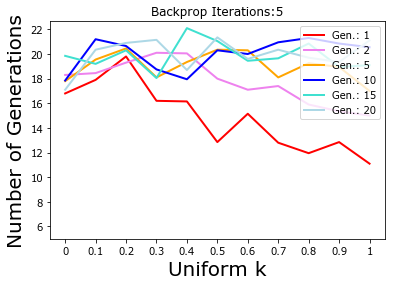

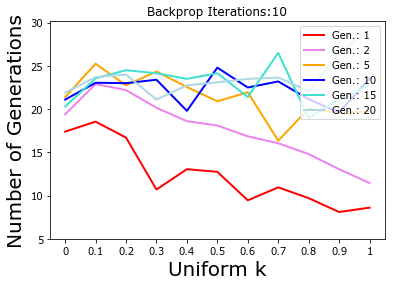

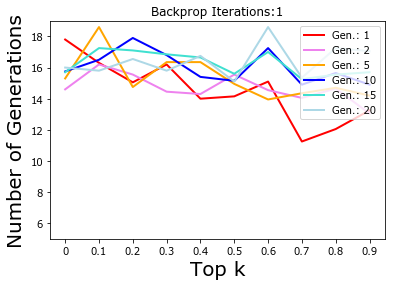

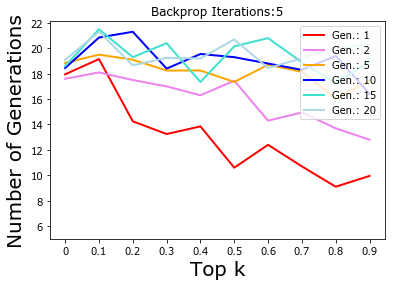

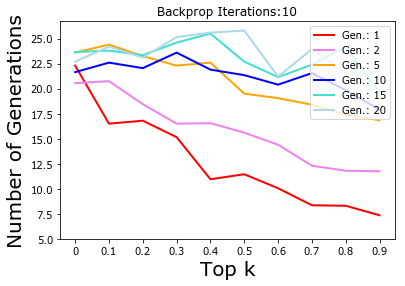

In [19]:
# Plots for results above
backpropGeneration = [1, 2, 5, 10, 15, 20] # every how many generations to perfrom backprop
bIterations = [1, 5, 10] # how many iterations of backprop to perform
uniformK = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
topK = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Initialize arrays
res = []
for i in bIterations:
    resI = []
    for g in backpropGeneration:
        resG = []
        for u in uniformK:
            resG.append([])
        resI.append(resG)
    res.append(resI)

resTop = []
for i in bIterations:
    resI = []
    for g in backpropGeneration:
        resG = []
        for t in topK:
            resG.append([])
        resI.append(resG)
    resTop.append(resI)
       
# Determine parameter values of each file               
for fIndex, f in enumerate(all_files):
    index = f.find("gen") + 3
    character = f[index]
    g = ""
    while character.isdigit():
        g += character
        index += 1
        character = f[index]
        
    index = f.find("_it") + 3
    character = f[index]
    i = ""
    while character.isdigit():
        i += character
        index += 1
        character = f[index]
        
    index = f.find("unK") + 3
    character = f[index]
    u = ""
    while character.isdigit() or character == ".":
        u += character
        index += 1
        character = f[index]
    
    index = f.find("topK") + 4
    character = f[index]
    t = ""
    while character.isdigit() or character == ".":
        t += character
        index += 1
        character = f[index]
        
    if len(u) > 0:
        res[bIterations.index(int(i))][backpropGeneration.index(int(g))][uniformK.index(float(u))].append(all_vals[fIndex])
    if not t == "1":
        resTop[bIterations.index(int(i))][backpropGeneration.index(int(g))][topK.index(float(t))].append(all_vals[fIndex])
        
colors = ["red", "violet", "orange", "blue", "turquoise", "lightblue", 
          "darkgreen", "limegreen", "#ffea00"]

# Plots for uniform k
for iIndex, i in enumerate(bIterations):
    c = 0
    for gIndex, g in enumerate(backpropGeneration):
        vals = [np.mean(x) for x in res[iIndex][gIndex]] # averages
        lb = [sms.DescrStatsW(x).tconfint_mean()[0] for x in res[iIndex][gIndex]]
        ub = [sms.DescrStatsW(x).tconfint_mean()[1] for x in res[iIndex][gIndex]]
        plt.plot(np.arange(len(uniformK)), vals,  color = colors[c], linestyle = "-", 
                     linewidth = 2, label = "Gen.: " + str(g))
        
        #plt.fill_between(range(np.array(vals).shape[0]), ub, 
         #        lb, color = colors[c], alpha=.2) # confidence intervals
        c += 1

    axes = plt.gca()
    axes.set_xlabel("Uniform k", size = 20)
    axes.set_ylabel("Number of Generations", size = 20)
    plt.title("Backprop Iterations:" + str(i))
    plt.xticks(np.arange(len(uniformK)), uniformK)
    axes.legend(loc=1, prop={'size': 10})
    axes.set_ylim(bottom=5)
    plt.show()
    #fig.savefig("Q4_ucbFixed.png", quality = 90) # save plot

# Plots for top k
for iIndex, i in enumerate(bIterations):
    c = 0
    for gIndex, g in enumerate(backpropGeneration):
        vals = [np.mean(x) for x in resTop[iIndex][gIndex]] # averages
        lb = [sms.DescrStatsW(x).tconfint_mean()[0] for x in resTop[iIndex][gIndex]]
        ub = [sms.DescrStatsW(x).tconfint_mean()[1] for x in resTop[iIndex][gIndex]]
        plt.plot(np.arange(len(topK)), vals,  color = colors[c], linestyle = "-", 
                     linewidth = 2, label = "Gen.: " + str(g))
        
        #plt.fill_between(range(np.array(vals).shape[0]), ub, 
         #        lb, color = colors[c], alpha=.2) # confidence intervals
        c += 1

    axes = plt.gca()
    axes.set_xlabel("Top k", size = 20)
    axes.set_ylabel("Number of Generations", size = 20)
    plt.title("Backprop Iterations:" + str(i))
    plt.xticks(np.arange(len(topK)), topK)
    axes.legend(loc=1, prop={'size': 10})
    axes.set_ylim(bottom=5)
    plt.show()

#### Tree size (number of nodes)

In [4]:
all_results, all_params_to_s, all_s_to_params, all_s, all_files, all_vals = aggregateParams("../experiments_numInd_withInitial_genIter/", valType = "tree_size", allStats = True, printNum = 10)

100% (7560 of 7560) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


Result 0: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK1_gen10_lr0.001_it10_oIt10 with mean tree size 5.7 , std tree size 2.696976865033572
Result 1: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK1_gen20_lr0.001_it10_oIt10 with mean tree size 5.9 , std tree size 6.206109044617587
Result 2: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0.8_gen2_lr0.001_it10_oIt10 with mean tree size 6.2 , std tree size 3.6360765436908706
Result 3: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0.8_gen2_lr0.001_it10_oIt10 with mean tree size 6.2 , std tree size 3.6360765436908706
Result 4: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0.8_gen1_lr0.001_it5_oIt5 with mean tree size 6.4 , std tree size 3.1187041843486347
Result 5: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0.8_gen1_lr0.001_it5_oIt5 with mean tree size 6.4 , std tree size 3.1187041843486347
Result 6: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0.6_gen1_lr0.001_it10_oI

### without initial backprop, with iterations and generations (learning rate 0.001)

#### Test MSE

In [5]:
all_results, all_params_to_mse, all_mse_to_params, all_mse, all_files, all_vals = aggregateParams("../experiments_numInd_noInitial_genIter/", allStats = True)

100% (7560 of 7560) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


Result 0: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK0.5_unK-1_gen1_lr0.001_it5_oIt5 with mean mse 4160.636 , std mse 1012.8150080474247
Result 1: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0.5_gen1_lr0.001_it5_oIt5 with mean mse 4292.94985 , std mse 927.7004539996664
Result 2: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK0.6_unK-1_gen1_lr0.001_it10_oIt10 with mean mse 4294.23045 , std mse 1362.267176649723
Result 3: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0.4_gen1_lr0.001_it10_oIt10 with mean mse 4464.74665 , std mse 1317.1520715253032
Result 4: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK0.1_unK-1_gen1_lr0.001_it10_oIt10 with mean mse 4517.9019 , std mse 1255.500965406571
Result 5: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0.4_gen2_lr0.001_it10_oIt10 with mean mse 4522.16935 , std mse 1278.3917627020069
Result 6: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK1_gen1_lr0.001_it10_oIt10 with mean mse 4540.22415 , 

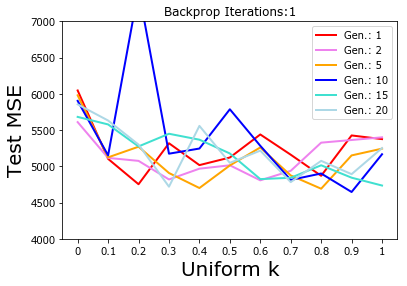

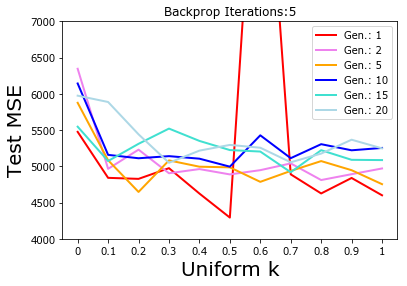

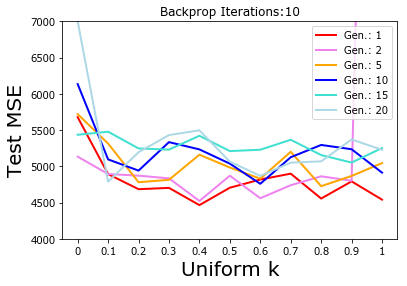

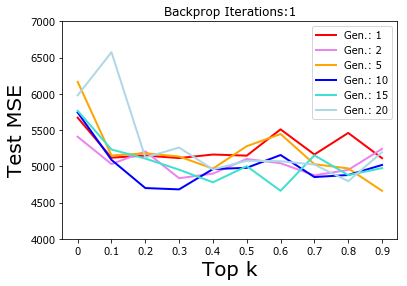

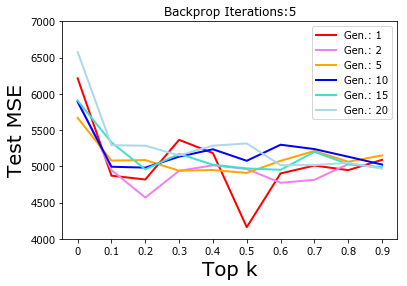

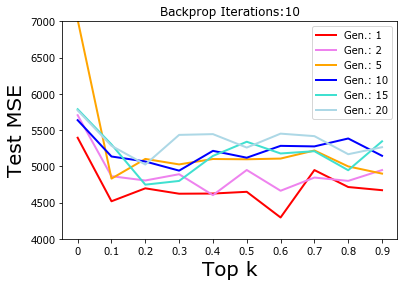

In [9]:
# Plots for results above
backpropGeneration = [1, 2, 5, 10, 15, 20] # every how many generations to perfrom backprop
bIterations = [1, 5, 10] # how many iterations of backprop to perform
uniformK = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
topK = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Initialize arrays
res = []
for i in bIterations:
    resI = []
    for g in backpropGeneration:
        resG = []
        for u in uniformK:
            resG.append([])
        resI.append(resG)
    res.append(resI)

resTop = []
for i in bIterations:
    resI = []
    for g in backpropGeneration:
        resG = []
        for t in topK:
            resG.append([])
        resI.append(resG)
    resTop.append(resI)
       
# determine parameter value for each file
for fIndex, f in enumerate(all_files):
    index = f.find("gen") + 3
    character = f[index]
    g = ""
    while character.isdigit():
        g += character
        index += 1
        character = f[index]
        
    index = f.find("_it") + 3
    character = f[index]
    i = ""
    while character.isdigit():
        i += character
        index += 1
        character = f[index]
        
    index = f.find("unK") + 3
    character = f[index]
    u = ""
    while character.isdigit() or character == ".":
        u += character
        index += 1
        character = f[index]
    
    index = f.find("topK") + 4
    character = f[index]
    t = ""
    while character.isdigit() or character == ".":
        t += character
        index += 1
        character = f[index]
        
    if len(u) > 0:
        res[bIterations.index(int(i))][backpropGeneration.index(int(g))][uniformK.index(float(u))].append(all_vals[fIndex])
    if not t == "1":
        resTop[bIterations.index(int(i))][backpropGeneration.index(int(g))][topK.index(float(t))].append(all_vals[fIndex])

# Create Plots
colors = ["red", "violet", "orange", "blue", "turquoise", "lightblue", 
          "darkgreen", "limegreen", "#ffea00"]

# Plots for uniform k
for iIndex, i in enumerate(bIterations):
    c = 0
    for gIndex, g in enumerate(backpropGeneration):
        vals = [np.mean(x) for x in res[iIndex][gIndex]] # averages
        lb = [sms.DescrStatsW(x).tconfint_mean()[0] for x in res[iIndex][gIndex]]
        ub = [sms.DescrStatsW(x).tconfint_mean()[1] for x in res[iIndex][gIndex]]
        plt.plot(np.arange(len(uniformK)), vals,  color = colors[c], linestyle = "-", 
                     linewidth = 2, label = "Gen.: " + str(g))
        #plt.fill_between(range(np.array(vals).shape[0]), ub, 
        #         lb, color = colors[c], alpha=.2) # confidence intervals
        c += 1

    axes = plt.gca()
    axes.set_xlabel("Uniform k", size = 20)
    axes.set_ylabel("Test MSE", size = 20)
    plt.title("Backprop Iterations:" + str(i))
    plt.xticks(np.arange(len(uniformK)), uniformK)
    axes.legend(loc=1, prop={'size': 10})
    axes.set_ylim(bottom=4000, top = 7000)
    plt.show()
    #fig.savefig("Q4_ucbFixed.png", quality = 90) # save plot

# Plots for top k
for iIndex, i in enumerate(bIterations):
    c = 0
    for gIndex, g in enumerate(backpropGeneration):
        vals = [np.mean(x) for x in resTop[iIndex][gIndex]] # averages
        lb = [sms.DescrStatsW(x).tconfint_mean()[0] for x in resTop[iIndex][gIndex]]
        ub = [sms.DescrStatsW(x).tconfint_mean()[1] for x in resTop[iIndex][gIndex]]
        plt.plot(np.arange(len(topK)), vals,  color = colors[c], linestyle = "-", 
                     linewidth = 2, label = "Gen.: " + str(g))
        #plt.fill_between(range(np.array(vals).shape[0]), ub, 
        #         lb, color = colors[c], alpha=.2) # confidence intervals
        c += 1

    axes = plt.gca()
    axes.set_xlabel("Top k", size = 20)
    axes.set_ylabel("Test MSE", size = 20)
    plt.title("Backprop Iterations:" + str(i))
    plt.xticks(np.arange(len(topK)), topK)
    axes.legend(loc=1, prop={'size': 10})
    axes.set_ylim(bottom=4000, top = 7000)
    plt.show()

#### Number of generations

In [13]:
all_results, all_params_to_mse, all_mse_to_params, all_mse, all_files, all_vals = aggregateParams("../experiments_numInd_noInitial_genIter/", printNum = 10, valType = "numGen", allStats = True)

100% (7560 of 7560) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


Result 0: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK0.9_unK-1_gen1_lr0.001_it10_oIt10 with mean numGen 7.95 - std numGen 0.7591546545162482
Result 1: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK0.8_unK-1_gen1_lr0.001_it10_oIt10 with mean numGen 9.05 - std numGen 0.8255779474818965
Result 2: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK1_gen1_lr0.001_it10_oIt10 with mean numGen 9.4 - std numGen 0.8825799501580878
Result 3: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK1_gen1_lr0.001_it10_oIt10 with mean numGen 9.4 - std numGen 0.8825799501580878
Result 4: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK0.6_unK-1_gen1_lr0.001_it10_oIt10 with mean numGen 10.1 - std numGen 1.2937094768634554
Result 5: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0.8_gen1_lr0.001_it10_oIt10 with mean numGen 10.45 - std numGen 1.050062654772261
Result 6: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0.8_gen1_lr0.001_it10_oIt10 with mean numGen 10.4

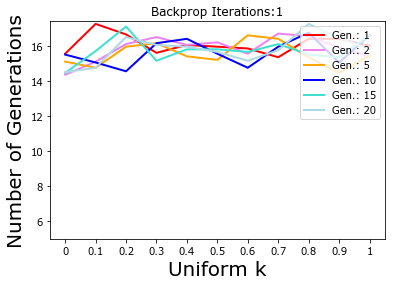

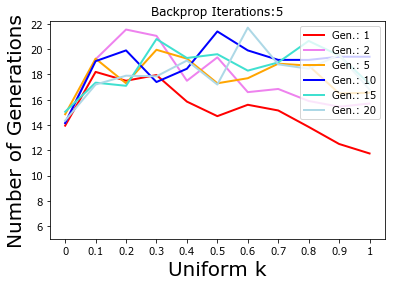

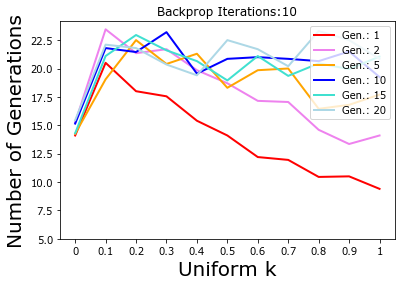

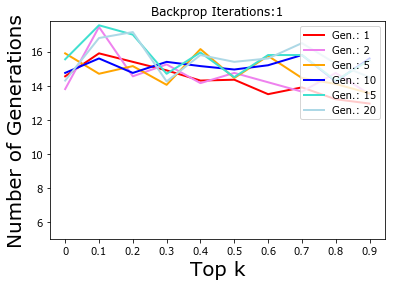

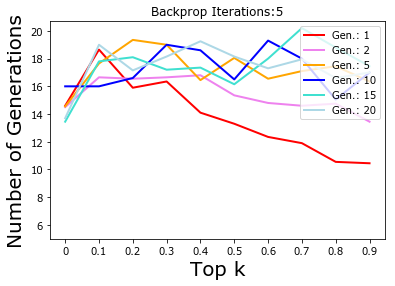

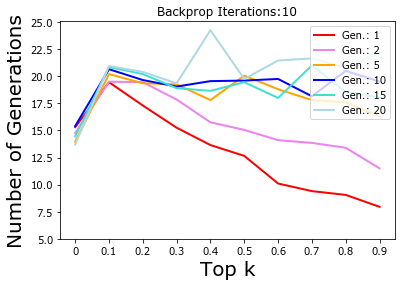

In [15]:
# Plots for results above
backpropGeneration = [1, 2, 5, 10, 15, 20] # every how many generations to perfrom backprop
bIterations = [1, 5, 10] # how many iterations of backprop to perform
uniformK = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
topK = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Initialize arrays
res = []
for i in bIterations:
    resI = []
    for g in backpropGeneration:
        resG = []
        for u in uniformK:
            resG.append([])
        resI.append(resG)
    res.append(resI)

resTop = []
for i in bIterations:
    resI = []
    for g in backpropGeneration:
        resG = []
        for t in topK:
            resG.append([])
        resI.append(resG)
    resTop.append(resI)
       
# Determine parameter values of each file               
for fIndex, f in enumerate(all_files):
    index = f.find("gen") + 3
    character = f[index]
    g = ""
    while character.isdigit():
        g += character
        index += 1
        character = f[index]
        
    index = f.find("_it") + 3
    character = f[index]
    i = ""
    while character.isdigit():
        i += character
        index += 1
        character = f[index]
        
    index = f.find("unK") + 3
    character = f[index]
    u = ""
    while character.isdigit() or character == ".":
        u += character
        index += 1
        character = f[index]
    
    index = f.find("topK") + 4
    character = f[index]
    t = ""
    while character.isdigit() or character == ".":
        t += character
        index += 1
        character = f[index]
        
    if len(u) > 0:
        res[bIterations.index(int(i))][backpropGeneration.index(int(g))][uniformK.index(float(u))].append(all_vals[fIndex])
    if not t == "1":
        resTop[bIterations.index(int(i))][backpropGeneration.index(int(g))][topK.index(float(t))].append(all_vals[fIndex])
        
colors = ["red", "violet", "orange", "blue", "turquoise", "lightblue", 
          "darkgreen", "limegreen", "#ffea00"]

# Plots for uniform k
for iIndex, i in enumerate(bIterations):
    c = 0
    for gIndex, g in enumerate(backpropGeneration):
        vals = [np.mean(x) for x in res[iIndex][gIndex]] # averages
        lb = [sms.DescrStatsW(x).tconfint_mean()[0] for x in res[iIndex][gIndex]]
        ub = [sms.DescrStatsW(x).tconfint_mean()[1] for x in res[iIndex][gIndex]]
        plt.plot(np.arange(len(uniformK)), vals,  color = colors[c], linestyle = "-", 
                     linewidth = 2, label = "Gen.: " + str(g))
        
        #plt.fill_between(range(np.array(vals).shape[0]), ub, 
         #        lb, color = colors[c], alpha=.2) # confidence intervals
        c += 1

    axes = plt.gca()
    axes.set_xlabel("Uniform k", size = 20)
    axes.set_ylabel("Number of Generations", size = 20)
    plt.title("Backprop Iterations:" + str(i))
    plt.xticks(np.arange(len(uniformK)), uniformK)
    axes.legend(loc=1, prop={'size': 10})
    axes.set_ylim(bottom=5)
    plt.show()
    #fig.savefig("Q4_ucbFixed.png", quality = 90) # save plot

# Plots for top k
for iIndex, i in enumerate(bIterations):
    c = 0
    for gIndex, g in enumerate(backpropGeneration):
        vals = [np.mean(x) for x in resTop[iIndex][gIndex]] # averages
        lb = [sms.DescrStatsW(x).tconfint_mean()[0] for x in resTop[iIndex][gIndex]]
        ub = [sms.DescrStatsW(x).tconfint_mean()[1] for x in resTop[iIndex][gIndex]]
        plt.plot(np.arange(len(topK)), vals,  color = colors[c], linestyle = "-", 
                     linewidth = 2, label = "Gen.: " + str(g))
        #plt.fill_between(range(np.array(vals).shape[0]), ub, 
        #         lb, color = colors[c], alpha=.2) # confidence intervals
        c += 1

    axes = plt.gca()
    axes.set_xlabel("Top k", size = 20)
    axes.set_ylabel("Number of Generations", size = 20)
    plt.title("Backprop Iterations:" + str(i))
    plt.xticks(np.arange(len(topK)), topK)
    axes.legend(loc=1, prop={'size': 10})
    axes.set_ylim(bottom=5)
    plt.show()

#### tree size (number of nodes)

In [20]:
all_results, all_params_to_mse, all_mse_to_params, all_mse, all_files, all_vals = aggregateParams("../experiments_numInd_noInitial_genIter/", printNum = 10, valType = "tree_size", allStats = True)

100% (7560 of 7560) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


Result 0: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK0.8_unK-1_gen2_lr0.001_it10_oIt10 with mean tree size 6.8 - std tree size 3.99473337493782
Result 1: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0.7_gen1_lr0.001_it10_oIt10 with mean tree size 7.2 - std tree size 4.5375625267549236
Result 2: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0.9_gen1_lr0.001_it10_oIt10 with mean tree size 7.4 - std tree size 4.569924564619836
Result 3: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0.9_gen1_lr0.001_it10_oIt10 with mean tree size 7.4 - std tree size 4.569924564619836
Result 4: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK0.9_unK-1_gen1_lr0.001_it10_oIt10 with mean tree size 7.5 - std tree size 3.4259074863841783
Result 5: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK0.7_unK-1_gen1_lr0.001_it10_oIt10 with mean tree size 7.6 - std tree size 5.43284359002578
Result 6: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK0.5_unK-1_gen1_lr0.001_i

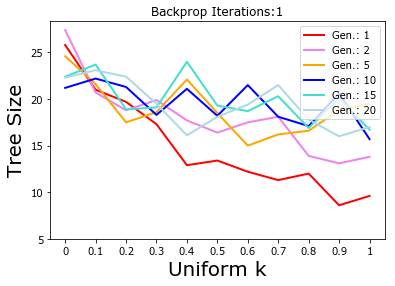

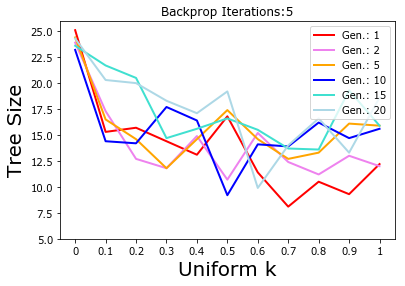

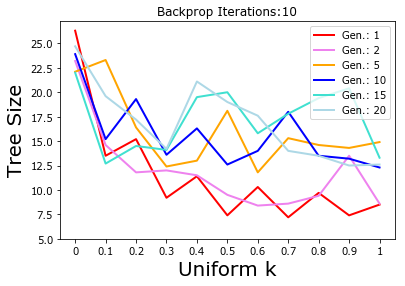

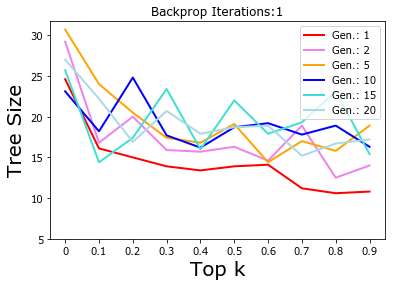

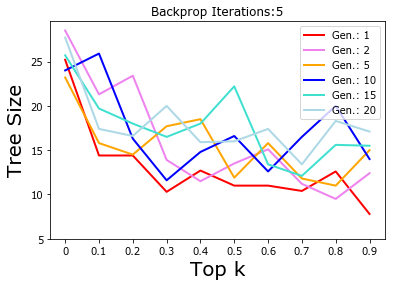

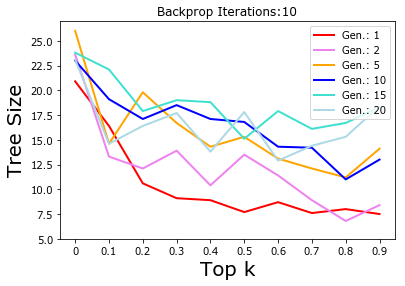

In [21]:
# Plots for results above
backpropGeneration = [1, 2, 5, 10, 15, 20] # every how many generations to perfrom backprop
bIterations = [1, 5, 10] # how many iterations of backprop to perform
uniformK = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
topK = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Initialize arrays
res = []
for i in bIterations:
    resI = []
    for g in backpropGeneration:
        resG = []
        for u in uniformK:
            resG.append([])
        resI.append(resG)
    res.append(resI)

resTop = []
for i in bIterations:
    resI = []
    for g in backpropGeneration:
        resG = []
        for t in topK:
            resG.append([])
        resI.append(resG)
    resTop.append(resI)
       
# Determine parameter values of each file               
for fIndex, f in enumerate(all_files):
    index = f.find("gen") + 3
    character = f[index]
    g = ""
    while character.isdigit():
        g += character
        index += 1
        character = f[index]
        
    index = f.find("_it") + 3
    character = f[index]
    i = ""
    while character.isdigit():
        i += character
        index += 1
        character = f[index]
        
    index = f.find("unK") + 3
    character = f[index]
    u = ""
    while character.isdigit() or character == ".":
        u += character
        index += 1
        character = f[index]
    
    index = f.find("topK") + 4
    character = f[index]
    t = ""
    while character.isdigit() or character == ".":
        t += character
        index += 1
        character = f[index]
        
    if len(u) > 0:
        res[bIterations.index(int(i))][backpropGeneration.index(int(g))][uniformK.index(float(u))].append(all_vals[fIndex])
    if not t == "1":
        resTop[bIterations.index(int(i))][backpropGeneration.index(int(g))][topK.index(float(t))].append(all_vals[fIndex])
        
colors = ["red", "violet", "orange", "blue", "turquoise", "lightblue", 
          "darkgreen", "limegreen", "#ffea00"]

# Plots for uniform k
for iIndex, i in enumerate(bIterations):
    c = 0
    for gIndex, g in enumerate(backpropGeneration):
        vals = [np.mean(x) for x in res[iIndex][gIndex]] # averages
        lb = [sms.DescrStatsW(x).tconfint_mean()[0] for x in res[iIndex][gIndex]]
        ub = [sms.DescrStatsW(x).tconfint_mean()[1] for x in res[iIndex][gIndex]]
        plt.plot(np.arange(len(uniformK)), vals,  color = colors[c], linestyle = "-", 
                     linewidth = 2, label = "Gen.: " + str(g))
        
        #plt.fill_between(range(np.array(vals).shape[0]), ub, 
         #        lb, color = colors[c], alpha=.2) # confidence intervals
        c += 1

    axes = plt.gca()
    axes.set_xlabel("Uniform k", size = 20)
    axes.set_ylabel("Tree Size", size = 20)
    plt.title("Backprop Iterations:" + str(i))
    plt.xticks(np.arange(len(uniformK)), uniformK)
    axes.legend(loc=1, prop={'size': 10})
    axes.set_ylim(bottom=5)
    plt.show()
    #fig.savefig("Q4_ucbFixed.png", quality = 90) # save plot

# Plots for top k
for iIndex, i in enumerate(bIterations):
    c = 0
    for gIndex, g in enumerate(backpropGeneration):
        vals = [np.mean(x) for x in resTop[iIndex][gIndex]] # averages
        lb = [sms.DescrStatsW(x).tconfint_mean()[0] for x in resTop[iIndex][gIndex]]
        ub = [sms.DescrStatsW(x).tconfint_mean()[1] for x in resTop[iIndex][gIndex]]
        plt.plot(np.arange(len(topK)), vals,  color = colors[c], linestyle = "-", 
                     linewidth = 2, label = "Gen.: " + str(g))
        #plt.fill_between(range(np.array(vals).shape[0]), ub, 
        #         lb, color = colors[c], alpha=.2) # confidence intervals
        c += 1

    axes = plt.gca()
    axes.set_xlabel("Top k", size = 20)
    axes.set_ylabel("Tree Size", size = 20)
    plt.title("Backprop Iterations:" + str(i))
    plt.xticks(np.arange(len(topK)), topK)
    axes.legend(loc=1, prop={'size': 10})
    axes.set_ylim(bottom=5)
    plt.show()

#### Overfitting: difference between train and test MSE

In [22]:
all_results, all_params_to_mse, all_mse_to_params, all_mse, all_files, all_vals = aggregateParams("../experiments_numInd_noInitial_genIter/", printNum = 10, valType = "diff_mse", allStats = True)

100% (7560 of 7560) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


Result 0: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0_gen2_lr0.001_it10_oIt10 with mean test - train MSE -644.7987000000002 - std test - train MSE 1829.1546041102704
Result 1: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK0_unK-1_gen10_lr0.001_it5_oIt5 with mean test - train MSE -410.12980000000005 - std test - train MSE 1155.445779909236
Result 2: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0_gen1_lr0.001_it1_oIt1 with mean test - train MSE -406.3959999999999 - std test - train MSE 2660.4485407903044
Result 3: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0_gen15_lr0.001_it10_oIt10 with mean test - train MSE -308.88235 - std test - train MSE 1865.2128819711106
Result 4: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK0_unK-1_gen20_lr0.001_it1_oIt1 with mean test - train MSE -276.66164999999995 - std test - train MSE 1542.8139247251831
Result 5: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0.5_gen1_lr0.001_it5_oIt5 with mean test -

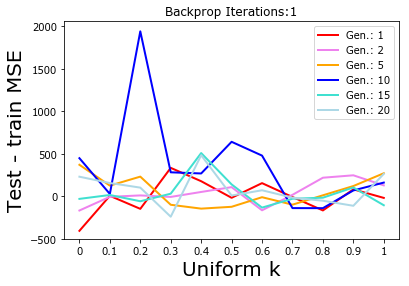

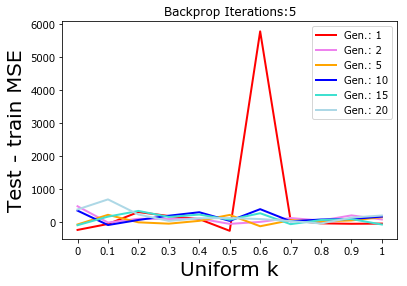

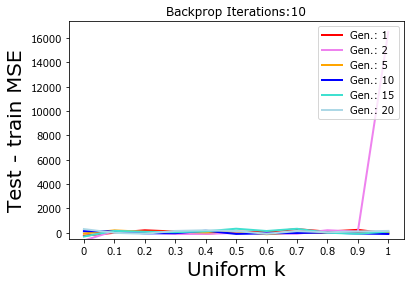

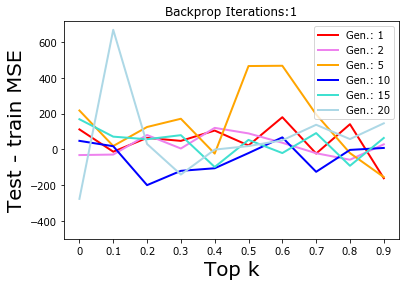

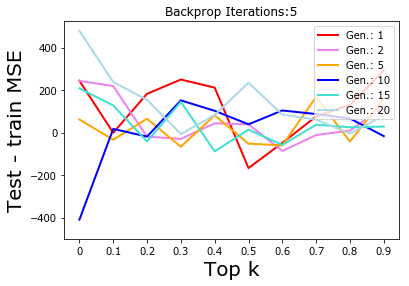

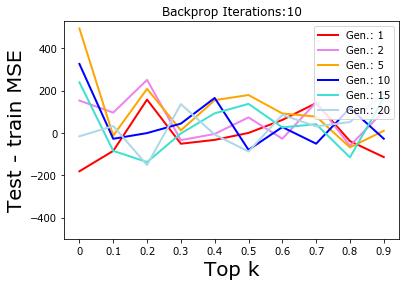

In [24]:
# Plots for results above
backpropGeneration = [1, 2, 5, 10, 15, 20] # every how many generations to perfrom backprop
bIterations = [1, 5, 10] # how many iterations of backprop to perform
uniformK = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
topK = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Initialize arrays
res = []
for i in bIterations:
    resI = []
    for g in backpropGeneration:
        resG = []
        for u in uniformK:
            resG.append([])
        resI.append(resG)
    res.append(resI)

resTop = []
for i in bIterations:
    resI = []
    for g in backpropGeneration:
        resG = []
        for t in topK:
            resG.append([])
        resI.append(resG)
    resTop.append(resI)
       
# Determine parameter values of each file               
for fIndex, f in enumerate(all_files):
    index = f.find("gen") + 3
    character = f[index]
    g = ""
    while character.isdigit():
        g += character
        index += 1
        character = f[index]
        
    index = f.find("_it") + 3
    character = f[index]
    i = ""
    while character.isdigit():
        i += character
        index += 1
        character = f[index]
        
    index = f.find("unK") + 3
    character = f[index]
    u = ""
    while character.isdigit() or character == ".":
        u += character
        index += 1
        character = f[index]
    
    index = f.find("topK") + 4
    character = f[index]
    t = ""
    while character.isdigit() or character == ".":
        t += character
        index += 1
        character = f[index]
        
    if len(u) > 0:
        res[bIterations.index(int(i))][backpropGeneration.index(int(g))][uniformK.index(float(u))].append(all_vals[fIndex])
    if not t == "1":
        resTop[bIterations.index(int(i))][backpropGeneration.index(int(g))][topK.index(float(t))].append(all_vals[fIndex])
        
colors = ["red", "violet", "orange", "blue", "turquoise", "lightblue", 
          "darkgreen", "limegreen", "#ffea00"]

# Plots for uniform k
for iIndex, i in enumerate(bIterations):
    c = 0
    for gIndex, g in enumerate(backpropGeneration):
        vals = [np.mean(x) for x in res[iIndex][gIndex]] # averages
        lb = [sms.DescrStatsW(x).tconfint_mean()[0] for x in res[iIndex][gIndex]]
        ub = [sms.DescrStatsW(x).tconfint_mean()[1] for x in res[iIndex][gIndex]]
        plt.plot(np.arange(len(uniformK)), vals,  color = colors[c], linestyle = "-", 
                     linewidth = 2, label = "Gen.: " + str(g))
        
        #plt.fill_between(range(np.array(vals).shape[0]), ub, 
         #        lb, color = colors[c], alpha=.2) # confidence intervals
        c += 1

    axes = plt.gca()
    axes.set_xlabel("Uniform k", size = 20)
    axes.set_ylabel("Test - train MSE", size = 20)
    plt.title("Backprop Iterations:" + str(i))
    plt.xticks(np.arange(len(uniformK)), uniformK)
    axes.legend(loc=1, prop={'size': 10})
    axes.set_ylim(bottom=-500)
    plt.show()
    #fig.savefig("Q4_ucbFixed.png", quality = 90) # save plot

# Plots for top k
for iIndex, i in enumerate(bIterations):
    c = 0
    for gIndex, g in enumerate(backpropGeneration):
        vals = [np.mean(x) for x in resTop[iIndex][gIndex]] # averages
        lb = [sms.DescrStatsW(x).tconfint_mean()[0] for x in resTop[iIndex][gIndex]]
        ub = [sms.DescrStatsW(x).tconfint_mean()[1] for x in resTop[iIndex][gIndex]]
        plt.plot(np.arange(len(topK)), vals,  color = colors[c], linestyle = "-", 
                     linewidth = 2, label = "Gen.: " + str(g))
        #plt.fill_between(range(np.array(vals).shape[0]), ub, 
        #         lb, color = colors[c], alpha=.2) # confidence intervals
        c += 1

    axes = plt.gca()
    axes.set_xlabel("Top k", size = 20)
    axes.set_ylabel("Test - train MSE", size = 20)
    plt.title("Backprop Iterations:" + str(i))
    plt.xticks(np.arange(len(topK)), topK)
    axes.legend(loc=1, prop={'size': 10})
    axes.set_ylim(bottom=-500)
    plt.show()

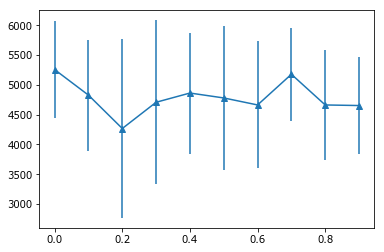

In [4]:
# initial back propagation, plot for different top_k, 20 crossval, 10 iterations of backprop is best, every generation best
template_top = "maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK{}_unK-1_gen1_lr0.001_it10_oIt10"
top = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

errorbar_plot(calc_means_and_stds(template_top, top, all_params_to_mse))

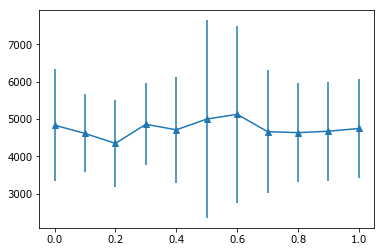

In [5]:
# initial back propagation, plot for different uniform_k, 20 crossval, 1 iteration of backprop is best, every 10th gen.
template_uniform = "maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK{}_gen10_lr0.001_it1_oIt1"
u = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

errorbar_plot(calc_means_and_stds(template_uniform, u, all_params_to_mse))

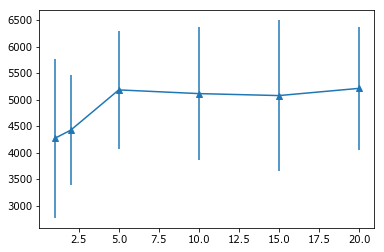

In [10]:
# initial back propagation, plot for different uniform_k, 20 crossval, 10 iteration of backprop is best, top_k = 0.2
template_gen = "maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK0.2_unK-1_gen{}_lr0.001_it10_oIt10"
backpropGeneration = [1, 2, 5, 10, 15, 20]

errorbar_plot(calc_means_and_stds(template_gen,backpropGeneration , all_params_to_mse))

### No initial backprop

In [25]:
all_results, all_params_to_mse, all_mse_to_params, all_mse, _, _ = aggregateParams("../experiments_numInd_noInitial/")

100% (420 of 420) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


Result 0: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0.3_gen1_lr0.001_it5_oIt5 with mean mse 4308.5516, std mse 1263.1727341053142
Result 1: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0.4_gen1_lr0.001_it5_oIt5 with mean mse 4352.8451, std mse 842.9848870826684
Result 2: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0_gen1_lr0.001_it5_oIt5 with mean mse 4469.6975, std mse 1331.445743194948
Result 3: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0.2_gen1_lr0.001_it5_oIt5 with mean mse 4500.15695, std mse 1441.183079872866
Result 4: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0.5_gen1_lr0.001_it5_oIt5 with mean mse 4513.54565, std mse 1274.5757910102059
Result 5: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0.6_gen1_lr0.001_it5_oIt5 with mean mse 4558.656, std mse 1524.5859727082077
Result 6: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0.8_gen1_lr0.001_it5_oIt5 with mean mse 4567.38135, std mse 1054.986567273

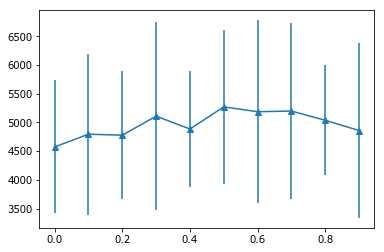

In [21]:
# no initial back propagation, plot for different top_k, 20 iterations
template_top = "maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK{}_unK-1_gen1_lr0.001_it5_oIt5"
top = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

errorbar_plot(calc_means_and_stds(template_top, top, all_params_to_mse))

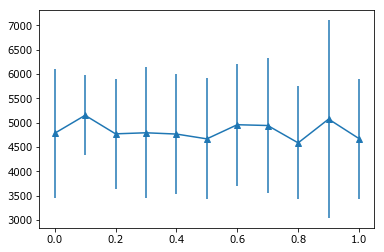

In [18]:
# no initial back propagation, plot for different uniform_k
template_uniform = "maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK{}_gen1_lr0.001_it5_oIt5"
u = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

errorbar_plot(calc_means_and_stds(template_uniform, u, all_params_to_mse))

### With initial backprop

In [22]:
all_results, all_params_to_mse, all_mse_to_params, all_mse = aggregateParams("../experiments_numInd_initialBackpropToo/")

100% (420 of 420) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


Result 0: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0.8_gen1_lr0.001_it5_oIt5 with mean mse 4584.4466, std mse 1158.6360423345518
Result 1: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0.5_gen1_lr0.001_it5_oIt5 with mean mse 4666.71125, std mse 1243.0718689646005
Result 2: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK1_gen1_lr0.001_it5_oIt5 with mean mse 4671.7142, std mse 1234.067786602912
Result 3: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK0.9_unK-1_gen1_lr0.001_it5_oIt5 with mean mse 4729.9385, std mse 1530.8228696101392
Result 4: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0.4_gen1_lr0.001_it5_oIt5 with mean mse 4765.2578, std mse 1231.0527366092042
Result 5: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0.2_gen1_lr0.001_it5_oIt5 with mean mse 4769.9106, std mse 1123.0094078355241
Result 6: maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK0_gen1_lr0.001_it5_oIt5 with mean mse 4781.2569, std mse 1325.515123195

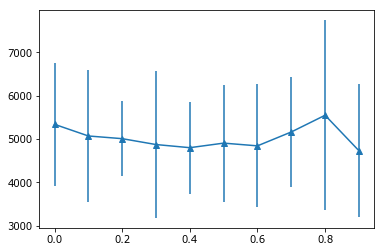

In [23]:
# with initial back propagation, plot for different top_k, 20 iterations
template_top = "maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK{}_unK-1_gen1_lr0.001_it5_oIt5"
top = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

errorbar_plot(calc_means_and_stds(template_top, top, all_params_to_mse))

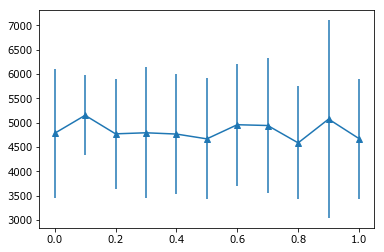

In [24]:
# with initial back propagation, plot for different uniform_k
template_uniform = "maxtime20_pop512_mr0.001_tour8_maxHeight2_cr1__topK1_unK{}_gen1_lr0.001_it5_oIt5"
u = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

errorbar_plot(calc_means_and_stds(template_uniform, u, all_params_to_mse))

### Analyse Simple GP Behaviour

Holding all other variables constant, lets see what affect the params have

In [4]:
from plot import calc_means_and_stds, errorbar_plot

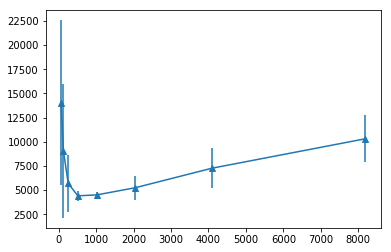

In [5]:
#### Variation with population size

template_pop_f = "maxtime20_pop{}_mr0.01_tour8_maxHeight2_cr1"
populations = [64, 128, 256, 512, 1024, 2048, 4096, 8192]

errorbar_plot(calc_means_and_stds(template_pop_f, populations, all_params_to_mse))

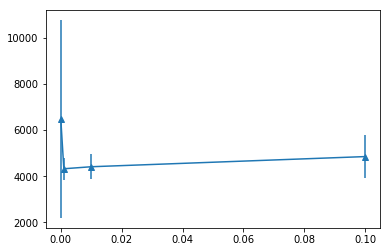

In [6]:
#### Variation with mutation rate

template_mr_f = "maxtime20_pop512_mr{}_tour8_maxHeight2_cr1"
mutation_rates = [0, 0.001, 0.01, 0.1]

errorbar_plot(calc_means_and_stds(template_mr_f, mutation_rates, all_params_to_mse))

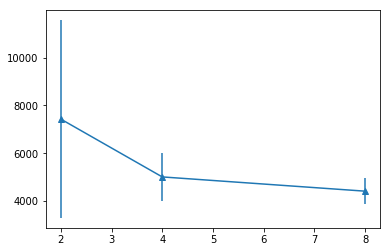

In [7]:
#### Variation with tour size

template_tour_f = "maxtime20_pop512_mr0.01_tour{}_maxHeight2_cr1"
tour_size = [2, 4, 8]

errorbar_plot(calc_means_and_stds(template_tour_f, tour_size, all_params_to_mse))

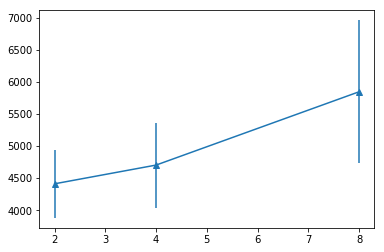

In [8]:
#### Variation with max height

template_max_f = "maxtime20_pop512_mr0.01_tour8_maxHeight{}_cr1"
maxHeights = [2, 4, 8]

errorbar_plot(calc_means_and_stds(template_max_f, maxHeights, all_params_to_mse))

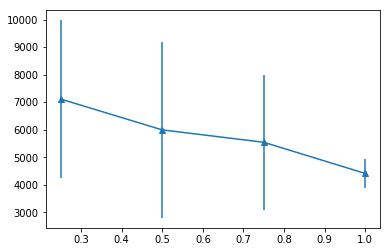

In [9]:
#### Variation with crossover rate

template_cr_f = "maxtime20_pop512_mr0.01_tour8_maxHeight2_cr{}"
crossoverRates = [0.25, 0.5, 0.75, 1] 

errorbar_plot(calc_means_and_stds(template_cr_f, crossoverRates, all_params_to_mse))

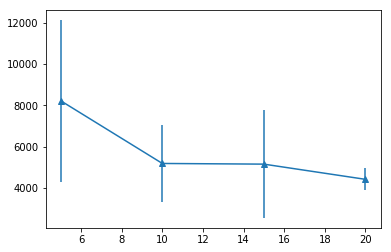

In [10]:
#### Variation with max time

template_mt_f = "maxtime{}_pop512_mr0.01_tour8_maxHeight2_cr1"
maxTime = [5, 10, 15, 20]

errorbar_plot(calc_means_and_stds(template_mt_f, maxTime, all_params_to_mse))